---
title: Orthodox Statistics
layout: collection
permalink: /Computational-Biology/Orthodox-Statistics
collection: Computational-Biology
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
---

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In orthodox statistics, or the frequency interpretation of probabilities, the probabilites only apply to variables that are random. Observations are considered random, whereas the parameter may be unknown but not random. Probabilities of a Random variable correspond to the frequency of occurrence in an infinite number of repetitions of the random experiment.

In the bayesian approach the data $\mathcal{D}$ are taken as given and probabilites are assigned to the parameter values $\theta$ based on their relative likelihoods of producing the observed data (Bayesian formula).

### P-value of a hypothesis test

Assume we observe a dataset $\mathcal{D}$with relatively large value like $m=9$. Assume we're in the setting of a hypergeometric distribution $\mathbb{P}(m | m, N, M)$,m where we have a population size of $N$, where we ahve $M$ mutants, we sample $n$ individuals from this population, m here is then the probability of observing m mutants in our sample size of $n$. The question then may be, for a given $M$, how likely is it that we get $m = 9$?
This can be estimated by the p-value, which gives us a probability of obtaining test results which are atleast as extreme as the observed results.
For our $m = 9$ we than want to ask, whats the probability of observing atleast $m = 9$, which is given by:

$$
\mathbb{P}(m \geq 9 | n, N, M)
$$

This is called the one tailed test where we look only at one side of our distribution. We calculate our p-value given our data $\mathcal{D}$ under a hypothisis of a parameter $\theta$, it then the given p-value is to low, we reject this parameter as a possible solution to our distribution.

The p-value then basically looks at, if $M$ was fixed, what would be the probability of observing our data. 
In the bayesian approach we would look at the data and check what would be the probability of a fixed $M$ given our data.

### Estimation of M

Assume we have $N=500$, $n = 7$ and $m=2$, we would then like to estimate our 95% intervall, $[M_{min}, M_{max}]$ where $M$ may lie in. To calculate this we can use the bayes formula using a uniform prior:

$$
\mathbb{P}(M | n, N, m) = \frac{\mathbb{P}(m | n, N, M)}{\sum_{M=0}^N \mathbb{P}(m | n, N, M)}
$$

We can then calculate our range of $M$ by calculating the left tail and right tail probabilities

$$
\mathbb{P}(M \leq M_{min} | m, n, N) = 0.025 \quad \text{and} \quad \mathbb{P}(M \geq M_{max} | m, n, N) = 0.975
$$

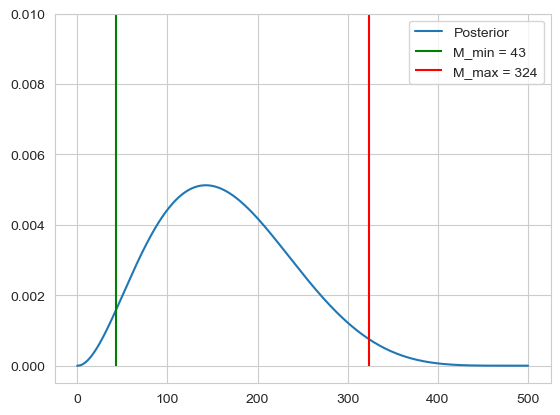

In [32]:
N = 500
n = 7
m = 2
M = np.arange(0, 501, 1)

hyper = sp.stats.hypergeom(N, M, n)
prob = hyper.pmf(m)

post = prob / np.sum(prob)
density = np.cumsum(post)

M_min = np.argmax(density > 0.025)
M_max = np.argmax(density > 0.975)

plt.plot(M, post, label='Posterior')
plt.vlines(ymin=-0, ymax=0.1, x=M_min, label=f'M_min = {M_min}', color='green')
plt.vlines(ymin=-0, ymax=0.1, x=M_max, label=f'M_max = {M_max}', color='red')
plt.ylim([-0.0005, 0.01])
plt.legend()
plt.show()

Using the orthodox approach for the estimation of $M$, because $M$ is not seen as random,  we can only look at a spceific distribution for a fixed $M$. 
So for a given $M$ we can find all $m$ which would not reject the hypothisis that $M$ has this value.
The idea is then, to find on both sides the most extreme value of $M$ for which the given $m$ doesn't reject the hypothisis.

In [108]:
N = 500
n = 7
m = 2
M = np.arange(0, 501, 1)
intervall = []
m_min_check = True
m_max_check = True

for M_i in np.flip(M):
    hyper = sp.stats.hypergeom(N, M_i, n)
    prob = hyper.pmf(M)
    m_max = np.argmax(np.cumsum(prob) >= 0.025)
    if m_max <= m:
        intervall.append(M_i)
        break

for M_i in M:
    hyper = sp.stats.hypergeom(N, M_i, n)
    prob = hyper.pmf(M)
    m_min = np.argmax(np.cumsum(prob) >= 0.025)
    if m_min > m:
        intervall.append(M_i)
        break
        


print(intervall)

[353, 354]


The frequency interpretation of the confidence intervall is that if we repeat an experiment many times, each time sampling M out of the total N and we then sample n times and observe m, then the confidence intervall will cover $M$ 95 % of the time.

The bayesian posterior probability interval is that the intervall is correct 95 % f the time when averaged over many datasets.

### Pathology of the confidence intervall

imagine we have the data of a Salmonella infection with infection days: $\mathcal{D} = \{12, 14, 16\}$, and we know that if one eats salmonella infected food at $t_0$, the probability to get sick at time t is given by an exponential distribution $\mathbb{P}(t | t_0, \tau, I)dt = \frac{\theta(t-t_0)}{\tau}e^{-(t - t_0)/\tau}$, here we set $\tau = 1$. Using a uniform prior, we can calculate our likelihood as:

$$
\prod_{i = 0}^{2} \left[ \theta(t_i-t_0)e^{-(t_i - t_0)} \right] = \theta(t_i-t_0) \theta(t_i-t_0) \theta(t_i-t_0) e^{-\sum_{i = 0}^2 (t_i - t_0)} = \theta(
\min(t_i)-t_0) e^{-\sum_{i = 0}^2 (t_i - t_0)}
=
\theta(\min(t_i)-t_0) e^{-3 (\bar{t} - t_0)}
$$

The posterior is then:

$$
\frac{\theta(\min(t_i)-t_0) e^{-3 (\bar{t} - t_0)}}{\int_{-\infty}^{\min(t_i)}e^{-3 (\bar{t} - t)}dt} 
= 
\frac{\theta(\min(t_i)-t_0) e^{-3 (\bar{t} - t_0)}}{\frac{1}{3} e^{-3 (\bar{t} - \min(t_i))}dt} = 3 \theta(\min(t_i)-t_0) e^{-3 (\min(t_i) - t_0)}
$$

For the confidence, we note that $t_0$ cant be bigger than 12, so we get $t_{max} = 12$, for $t_{min}$ we calculate

$$
\mathbb{P}(t_0 \geq t | D, I) = \int_{t_{min}}^{\min(t_i)} 3e^{-3(\min(t_1) - t_0)} dt_0= e^{-3(\min(t_1) - t_0)} \Bigr|_{t_{min}}^{\min(t_i)} = 1 - e^{-3(\min(t_i) - t_{min})} \Rightarrow t_{min} = \min(t_i) - 1 \overset{!}{=} 0.95 \\
\Rightarrow t_{min} = 11
$$

Thus we get our intervall of $[t_{min}, t_{max}] = [11, 12]$.

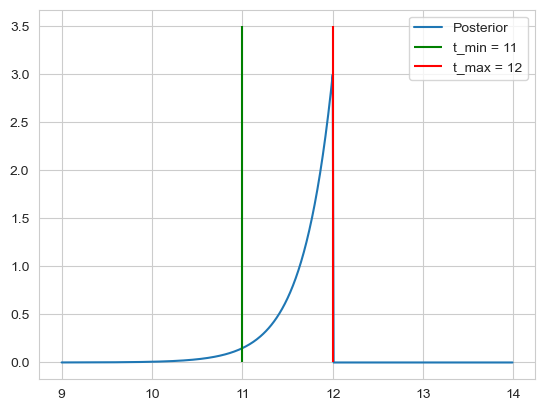

In [126]:
D = [12, 14, 16]
t = np.arange(9, 14, 0.01)
theta = (t <= min(D)) + 0

post = 3 * theta * np.exp(-3 * (min(D) - t))

plt.plot(t, post, label='Posterior')
plt.vlines(ymin=0, ymax=3.5, x=11, label=f't_min = {11}', color='green')
plt.vlines(ymin=0, ymax=3.5, x=12, label=f't_max = {12}', color='red')
plt.legend()
plt.show()

In the case of orthodox statistics, we would like to find the range of parameter values $t_0$ that are not rejected by the data.

For this we again look at our likelihood function

$$
\mathbb{P}(\mathcal{D} | t_0, I) = \frac{\Theta(\min(t_i) - t_0)}{\tau^n} e^{-n(\bar{t} - t_0)/\tau}
$$

The likelihood itself depends on the data through 3 parameters

1. The amount of datapoints $n$
2. The earliest datapoint $\min(t_i)$
3. The mean of the data points.

Here we fix $n = 3$ and look only at $t_0$ and $\bar{t}$. 
We want to choose a statistic as an estimator for our parameter of interest $t_0$. 
Because we have that $\langle t \rangle = t_0 + \tau$, a good estimator for $t_0$ is then $\bar{t} - \tau$.

In order to decide wether the data rejects a given hypothesis $t_0$ given the observed value of the statistic $\bar{t}$ we have to determine the sampling distribution of the statistic.

$$
\mathbb{P}(\bar{t} | t_0, \tau, n) = \frac{n}{(n-1)! \tau^n} (\bar{t} - t_0)^{n-1}e^{-n(\bar{t}-t_0)/\tau}
$$

With this distribution we then find the $t_0$ such that the $\bar{t}$ is just in the 95 % confidence intervall, i.e. we find the left and right 0.025 p values.

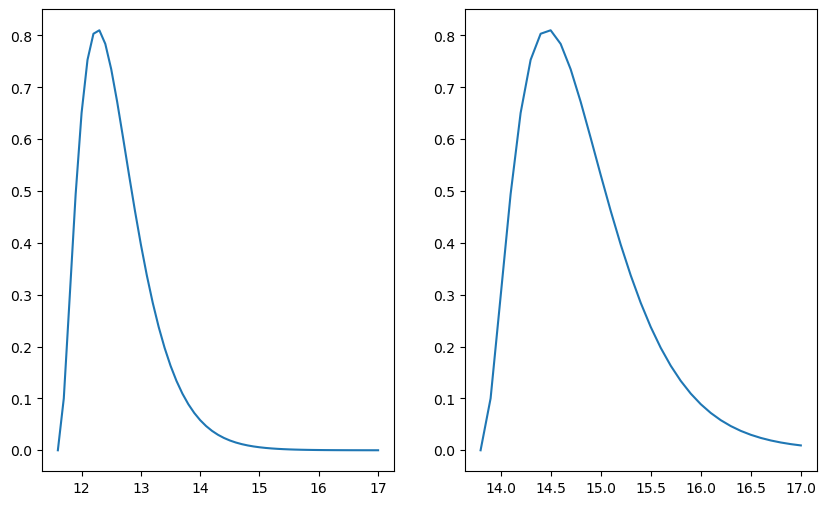

In [76]:
dist = lambda t, t_0 :  27/2  * (t - t_0)**2 * np.exp(-3 * (t - t_0)) 

t_min = np.arange(10, 14, 0.1)
t_max = np.arange(14, 17, 0.1)

m_max = 0 
for t_0 in np.arange(10, 17, 0.1):
    val = np.round(t_0, 1)
    index = np.where(np.round(t_min, 1) == val)[0][0]
    pl = np.sum(dist(t_min[index:], t_0) * 0.1)
    if pl < 0.025:
        m_max = t_0
        break

m_min = 0
for t_0 in np.arange(10, 17, 0.1):
    pr = np.sum(dist(t_max, t_0) * 0.1)
    if pr >= 0.025:
        m_min = t_0
        break
        
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

t_left = np.arange(m_min, 17, 0.1)
t_right = np.arange(m_max, 17, 0.1)
axs[0].plot(t_left, dist(t_left, m_min))
axs[1].plot(t_right, dist(t_right, m_max))
plt.show()

## Confidence intervalls

If we look at many different data-sets, and construct the 95% condfidence intervall for each data-set, then in the long run, 95% of the time the confidence interval will cover the true value of the parameter $t_0$. 
The confidence doesn't tell us how confident we can be, that $t_0$ lies in our confidence interval.
The fact that our confidence interval gave us a value for $t_0$ which we now not to be possible lies in the fact that we summarized our data with the statistic $\bar{t}$ instead of all the data.

# Sufficient Statistics

If we want to find out whether a statistic contains all the relevant information in the data regarding the parameter:
1. Let $S(\mathcal{D})$ denote the statistic of the data
2. Let $\alpha$ denote the parameter of interest and let $ \mathbb{P}(\mathcal{D} | \alpha) $ denote the likelihood
3. A sufficient statistic $S(\mathcal{D})$ satisfies: $ \mathbb{P}(\mathcal{D} | \alpha) = f(\mathcal{D})g(S(\mathcal{D})| \alpha) $

Thus for a sufficient statistic, the dependence on the parameter enters only through the sufficient statistic, i.e. $\alpha$ only appears in the function $g(S(\mathcal{D})|\alpha)$ which depends only on $S(\mathcal{D})$.


$$
\mathbb{P}(\mathcal{D} | t_0, I) 
= 
\frac{\Theta(t_1 - t_0)}{\tau^3} e^{- \sum_i (t_i - t_0)/\tau} = \underbrace{ \frac{e^{-\sum_i t_i / \tau}}{\tau^3} }_{f(\mathcal{D})}
\underbrace{\Theta(t_1 - t_0)e^{nt_0/\tau}}_{g(S(\mathcal{D}) | \alpha)}
$$

From this we can then see that $t_1$ is a sufficient statistic.
Using then the $t_1$ as a statistic we get the same confidence intervall as the bayesian posterior probability interval.
If there is a sufficient statistic it is often visible through the posterior, where the posterior depends only in one way on the data. 
There isn't always a sufficient statistic. 

In bayesian theory the probability is often seen as the plausibility of an event given the information
In orthodox statistics on the other hand, the probability represents the frequency at which the event occurs when it is repeated infinitely many times.

# Lead cup

Imagine we scoop a cup containing $m$ molecules and find that $k$ molecules contain lead.
What is now the probability that if we pick one more molecule, that that molecule is lead.
Given the posterior 

$$
\mathbb{P}(f | \mathcal{D}, I) = \frac{(m + 1)!}{k!(m-k)!} f^k (1 - f)^{m-k}
$$

If we want the probability of picking lead we have

$$
\mathbb{P}(lead | \mathcal{D}, I) 
= 
\int_{0}^1 \mathbb{P}(lead, f | \mathcal{D}, I) df 
= 
\int_{0}^1\mathbb{P}(lead, f| \mathcal{D}, I) df
=
\int_{0}^1\mathbb{P}(lead| f, \mathcal{D}, I) \mathbb{P}(f | \mathcal{D} , I) df
= 
\int_{0}^1 f \mathbb{P}(f | \mathcal{D} , I) df
$$

This is just the expectation of the posterior

$$
\mathbb{P}(lead | \mathcal{D}, I)  
= 
\int_{0}^1 f \mathbb{P}(f | \mathcal{D} , I) df
=
\frac{(m + 1)!}{k!(m-k)!} \int_{0}^1 f^{k+1} (1 - f)^{m-k} df
\overset{\text{Beta integral}}{=}
\frac{(m + 1)!}{k!(m-k)!} \frac{(k+1)!(m-k)!}{(m+2)!} 
=
\frac{k + 1}{m + 2}
$$

Then for $m \rightarrow 0$, i.e. if we dont have any molecules in our cup, then also $k = 0$ and the probability to get a lead molecule is $ \frac{1}{2} $. 
Also in the limit of large $m$ and $k$, the $+1$ and $+2$ become irrelevant.
This is the rule of succession. 
If we perform $m$ consecutive experiments and have $k$ successes then the probability of the next experiment being a success is given by 

$$
\mathbb{P}(success | m, k, I) = \frac{k + 1}{m + 2}
$$